In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('utf-8-spam.csv')

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1995,ham,Shall i come to get pickle,NaN,NaN,NaN
5556,ham,Yes i have. So that's why u texted. Pshew...mi...,NaN,NaN,NaN
5448,ham,"aight we can pick some up, you open before ton...",NaN,NaN,NaN
372,ham,I'm going for bath will msg you next &lt;#&gt...,NaN,NaN,NaN
5259,ham,Can help u swoop by picking u up from wherever...,NaN,NaN,NaN
4035,ham,How are you holding up?,NaN,NaN,NaN
4800,ham,The guy at the car shop who was flirting with ...,NaN,NaN,NaN
1635,ham,You have come into my life and brought the sun...,NaN,NaN,NaN
1234,ham,\Hello-/@drivby-:0quit edrunk sorry iff pthis ...,NaN,NaN,NaN
249,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## This is the first step to clean the data called Data Cleaning


In [5]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(10)

,v1,v2
1340,ham,Might ax well im there.
4148,ham,Haven't found a way to get another app for you...
4484,ham,What not under standing.
4027,ham,Lol its ok I didn't remember til last nite
191,ham,I'm sorry. I've joined the league of people th...
754,ham,Realy sorry-i don't recognise this number and ...
911,ham,I am sorry it hurt you.
1096,spam,Dear Subscriber ur draw 4 å£100 gift voucher w...
4972,ham,Oops I was in the shower when u called. Hey a ...
4036,ham,Dont flatter yourself... Tell that man of mine...


In [8]:
df.rename(columns={'v1':'Ham or Spam','v2':'SMS provided'},inplace=True)
df.sample(10)

,Ham or Spam,SMS provided
2158,ham,I think you should go the honesty road. Call t...
1385,ham,That's ok. I popped in to ask bout something a...
4259,ham,Are you plans with your family set in stone ?
2324,ham,Ok lor.
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
1676,ham,"Yeah, that's fine! It's å£6 to get in, is that..."
392,ham,Morning only i can ok.
546,ham,I know but you need to get hotel now. I just g...
2760,ham,I dont thnk its a wrong calling between us
3662,ham,Frnd s not juz a word.....not merely a relatio...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['Ham or Spam']=encoder.fit_transform(df['Ham or Spam'])
df.head(10)

,Ham or Spam,SMS provided
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [11]:
df.isnull().sum()

Ham or Spam     0
SMS provided    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

## The second step after cleaning is to perform EDA

In [16]:
df.head(10)

,Ham or Spam,SMS provided
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [17]:
df['Ham or Spam'].value_counts()

Ham or Spam
0    4516
1     653
Name: count, dtype: int64

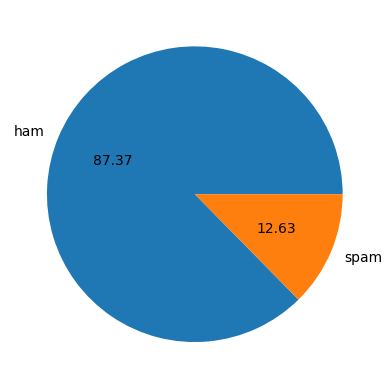

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Ham or Spam'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['character'] = df['SMS provided'].apply(len)
df.head(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12864\3558666979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['character'] = df['SMS provided'].apply(len)


,Ham or Spam,SMS provided,character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [22]:
df['word']=df['SMS provided'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12864\2741836245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word']=df['SMS provided'].apply(lambda x:len(nltk.word_tokenize(x)))


,Ham or Spam,SMS provided,character,word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


In [23]:
df['sentence'] = df['SMS provided'].apply(lambda x: len (nltk.sent_tokenize(x)))
df.head(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12864\1032423524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df['SMS provided'].apply(lambda x: len (nltk.sent_tokenize(x)))


,Ham or Spam,SMS provided,character,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [24]:
df[['character','word','sentence']].describe()

,character,word,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['Ham or Spam']==0][['character','word','sentence']].describe()

,character,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['Ham or Spam']==1][['character','word','sentence']].describe()

,character,word,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

<Axes: xlabel='character', ylabel='Count'>

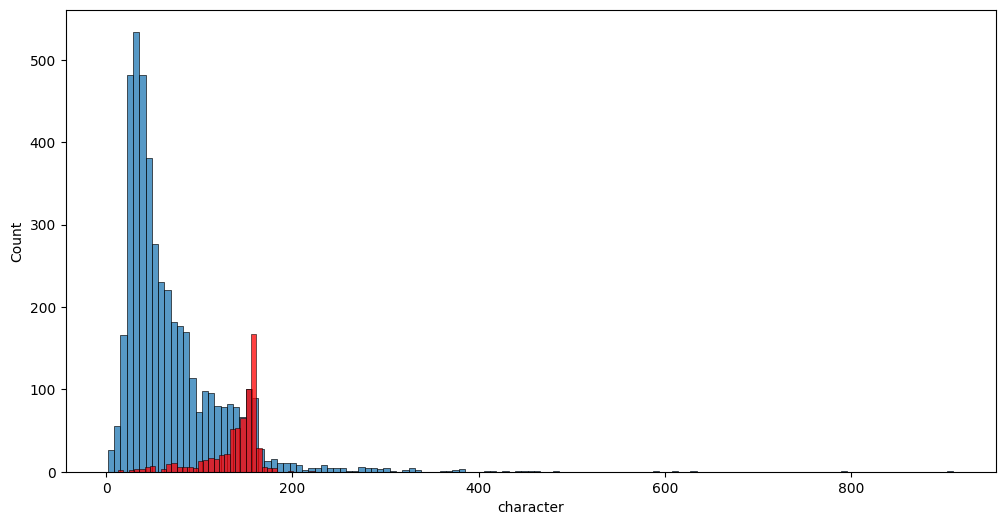

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Ham or Spam']==0]['character'])
sns.histplot(df[df['Ham or Spam']==1]['character'],color='red')

<Axes: xlabel='word', ylabel='Count'>

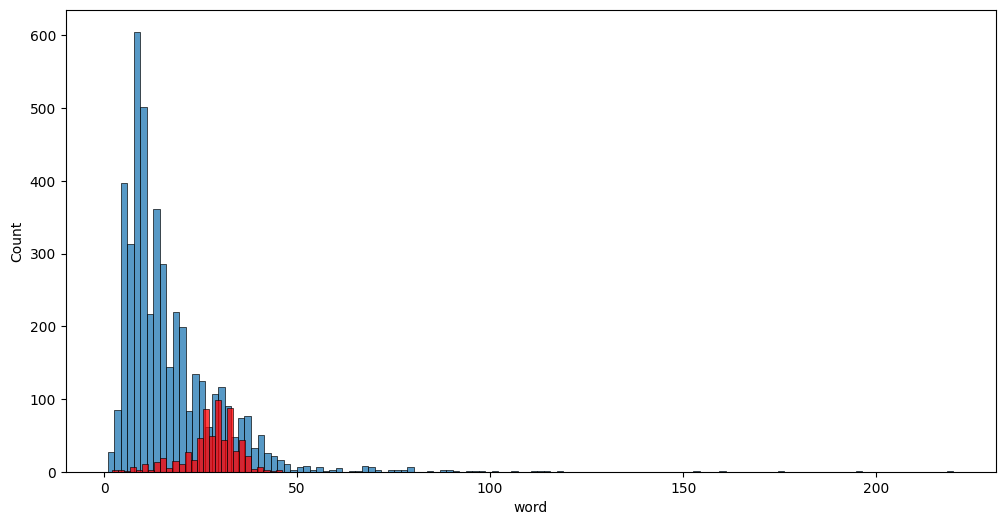

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Ham or Spam']==0]['word'])
sns.histplot(df[df['Ham or Spam']==1]['word'],color='red')

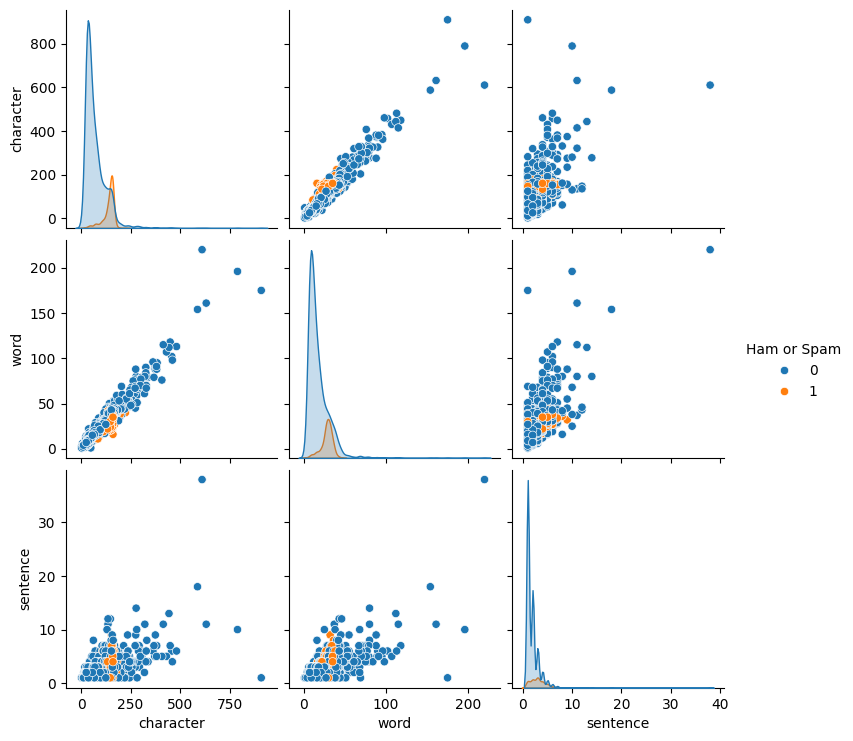

In [30]:
sns.pairplot(df,hue='Ham or Spam') 

## 3. The third step is Data Preprocessing or in this case it will be textual preprocessing where we we'll use the steps like conversion in lower case, tokenization,removing special characters,removing stop words and punctuation and lastly stemming


In [31]:
def transform_text(text):
    text=text.lower()
    return text

In [32]:
transform_text('Hi how Are you')

'hi how are you'

In [33]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text

In [34]:
transform_text('Hi how Are you')

['hi', 'how', 'are', 'you']

In [35]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
         if i.isalnum():
             y.append(i)
        
    
    return y

In [36]:
transform_text('Hi how Are you 20% eg')

['hi', 'how', 'are', 'you', '20', 'eg']

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [1]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
         if i.isalnum():
             y.append(i)

    
    test=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    return y

In [2]:
transform_text('Did you like my presentation on ML?')

NameError: name 'nltk' is not defined

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [42]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
         if i.isalnum():
             y.append(i)

    
    test=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return y

In [42]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
         if i.isalnum():
             y.append(i)

    
    test=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return y

In [43]:
transform_text('I loved the YT lectures on Machine Learning . How about you?')

['loved', 'yt', 'lectures', 'machine', 'learning']

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [45]:
df['transformed_text'] = df['SMS provided'].apply(transform_text)

C:\Users\Hp\AppData\Local\Temp\ipykernel_8364\778746799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['SMS provided'].apply(transform_text)


In [46]:
df.head(10)

,Ham or Spam,SMS provided,character,word,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, .., available, bugi..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, n't, think, goes, usf, lives, around, th..."
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,"[freemsg, hey, darling, 's, 3, week, 's, word,..."
6,0,Even my brother is not like to speak with me. ...,77,18,2,"[even, brother, like, speak, treat, like, aids..."
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,"[per, request, 'melle, melle, oru, minnaminung..."
8,1,WINNER!! As a valued network customer you have...,158,32,5,"[winner, valued, network, customer, selected, ..."
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,"[mobile, 11, months, u, r, entitled, update, l..."


In [47]:
df.head(10)

,Ham or Spam,SMS provided,character,word,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazy, .., available, bugi..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor, ..., u, c, already, ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, n't, think, goes, usf, lives, around, th..."
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,"[freemsg, hey, darling, 's, 3, week, 's, word,..."
6,0,Even my brother is not like to speak with me. ...,77,18,2,"[even, brother, like, speak, treat, like, aids..."
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,"[per, request, 'melle, melle, oru, minnaminung..."
8,1,WINNER!! As a valued network customer you have...,158,32,5,"[winner, valued, network, customer, selected, ..."
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,"[mobile, 11, months, u, r, entitled, update, l..."


C:\Users\Hp\AppData\Local\Temp\ipykernel_8364\729172223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['transformed_text'].astype(str)


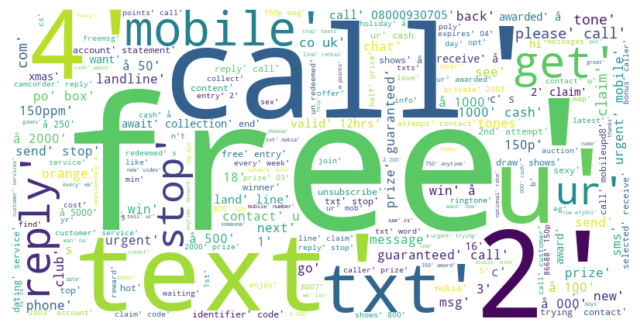

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['transformed_text'] = df['transformed_text'].astype(str)

spam_texts = " ".join(df[df['Ham or Spam'] == 1]['transformed_text'])


wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(spam_texts)


plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_8364\185669458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['transformed_text'].astype(str)


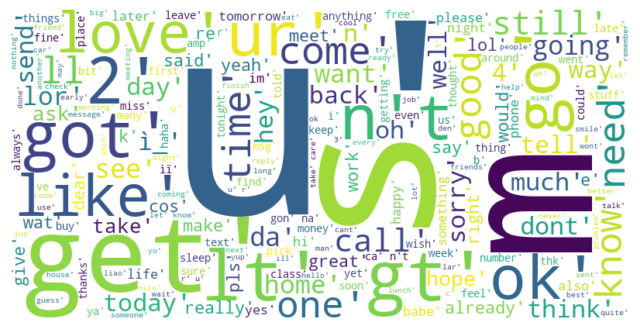

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['transformed_text'] = df['transformed_text'].astype(str)

ham_texts = " ".join(df[df['Ham or Spam'] == 0]['transformed_text'])


wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(ham_texts)


plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [50]:
df.head(10)

,Ham or Spam,SMS provided,character,word,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazy', '..', 'avai..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', '...', 'joking', 'wif', 'u', 'on..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'early', 'hor', '...', 'u'..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', ""n't"", 'think', 'goes', 'usf', 'lives'..."
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,"['freemsg', 'hey', 'darling', ""'s"", '3', 'week..."
6,0,Even my brother is not like to speak with me. ...,77,18,2,"['even', 'brother', 'like', 'speak', 'treat', ..."
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,"['per', 'request', ""'melle"", 'melle', 'oru', '..."
8,1,WINNER!! As a valued network customer you have...,158,32,5,"['winner', 'valued', 'network', 'customer', 's..."
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,"['mobile', '11', 'months', 'u', 'r', 'entitled..."


In [51]:
spam_corpus=[]
for msg in df[df['Ham or Spam']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [52]:
spam_corpus

["['free',",
 "'entry',",
 "'2',",
 "'wkly',",
 "'comp',",
 "'win',",
 "'fa',",
 "'cup',",
 "'final',",
 "'tkts',",
 "'21st',",
 "'may',",
 "'2005.',",
 "'text',",
 "'fa',",
 "'87121',",
 "'receive',",
 "'entry',",
 "'question',",
 "'std',",
 "'txt',",
 "'rate',",
 "'c',",
 '"\'s",',
 "'apply',",
 "'08452810075over18',",
 '"\'s"]',
 "['freemsg',",
 "'hey',",
 "'darling',",
 '"\'s",',
 "'3',",
 "'week',",
 '"\'s",',
 "'word',",
 "'back',",
 '"\'d",',
 "'like',",
 "'fun',",
 "'still',",
 "'tb',",
 "'ok',",
 "'xxx',",
 "'std',",
 "'chgs',",
 "'send',",
 "'å£1.50',",
 "'rcv']",
 "['winner',",
 "'valued',",
 "'network',",
 "'customer',",
 "'selected',",
 "'receivea',",
 "'å£900',",
 "'prize',",
 "'reward',",
 "'claim',",
 "'call',",
 "'09061701461.',",
 "'claim',",
 "'code',",
 "'kl341',",
 "'valid',",
 "'12',",
 "'hours']",
 "['mobile',",
 "'11',",
 "'months',",
 "'u',",
 "'r',",
 "'entitled',",
 "'update',",
 "'latest',",
 "'colour',",
 "'mobiles',",
 "'camera',",
 "'free',",
 "'call',",


In [53]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(10))[0]

0      'call',
1      'free',
2         '2',
3       'txt',
4        'ur',
5      'text',
6         'u',
7    'mobile',
8         '4',
9     'claim',
Name: 0, dtype: object

In [54]:
ham_corpus=[]
for msg in df[df['Ham or Spam']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [55]:
ham_corpus

["['go',",
 "'jurong',",
 "'point',",
 "'crazy',",
 "'..',",
 "'available',",
 "'bugis',",
 "'n',",
 "'great',",
 "'world',",
 "'la',",
 "'e',",
 "'buffet',",
 "'...',",
 "'cine',",
 "'got',",
 "'amore',",
 "'wat',",
 "'...']",
 "['ok',",
 "'lar',",
 "'...',",
 "'joking',",
 "'wif',",
 "'u',",
 "'oni',",
 "'...']",
 "['u',",
 "'dun',",
 "'say',",
 "'early',",
 "'hor',",
 "'...',",
 "'u',",
 "'c',",
 "'already',",
 "'say',",
 "'...']",
 "['nah',",
 '"n\'t",',
 "'think',",
 "'goes',",
 "'usf',",
 "'lives',",
 "'around',",
 "'though']",
 "['even',",
 "'brother',",
 "'like',",
 "'speak',",
 "'treat',",
 "'like',",
 "'aids',",
 "'patent']",
 "['per',",
 "'request',",
 '"\'melle",',
 "'melle',",
 "'oru',",
 "'minnaminunginte',",
 "'nurungu',",
 "'vettam',",
 "'set',",
 "'callertune',",
 "'callers',",
 "'press',",
 "'9',",
 "'copy',",
 "'friends',",
 "'callertune']",
 '["\'m",',
 "'gon',",
 "'na',",
 "'home',",
 "'soon',",
 '"n\'t",',
 "'want',",
 "'talk',",
 "'stuff',",
 "'anymore',",
 "'ton

In [56]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(10))[0]

0      'u',
1    '...',
2    '...']
3     '..',
4     "'s",
5    "n't",
6      '2',
7     'lt',
8     "'m",
9    'get',
Name: 0, dtype: object

In [57]:
df.head(10)

,Ham or Spam,SMS provided,character,word,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazy', '..', 'avai..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', '...', 'joking', 'wif', 'u', 'on..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'early', 'hor', '...', 'u'..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', ""n't"", 'think', 'goes', 'usf', 'lives'..."
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,"['freemsg', 'hey', 'darling', ""'s"", '3', 'week..."
6,0,Even my brother is not like to speak with me. ...,77,18,2,"['even', 'brother', 'like', 'speak', 'treat', ..."
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,"['per', 'request', ""'melle"", 'melle', 'oru', '..."
8,1,WINNER!! As a valued network customer you have...,158,32,5,"['winner', 'valued', 'network', 'customer', 's..."
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,"['mobile', '11', 'months', 'u', 'r', 'entitled..."


## 4. Now we'll do Model Building. As it is a textual data so naive base will be best suited and we'll use other algrithm too

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [59]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [60]:
y=df['Ham or Spam'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
      

0.9081237911025145
[[816  80]
 [ 15 123]]
0.6059113300492611


In [67]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[878  18]
 [  8 130]]
0.8783783783783784


In [68]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[893   3]
 [ 21 117]]
0.975


In [69]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf=TfidfVectorizer()

In [70]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [71]:
y=df['Ham or Spam'].values

In [72]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
      

0.9042553191489362
[[816  80]
 [ 19 119]]
0.5979899497487438


In [78]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [79]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[893   3]
 [ 21 117]]
0.975


## 4. After the building of model we'll work on its improvement.So, the next step is Model Improvement

In [80]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tfidf=TfidfVectorizer(max_features=3000)

In [81]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [82]:
y=df['Ham or Spam'].values

In [83]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [87]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [88]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8887814313346228
[[798  98]
 [ 17 121]]
0.5525114155251142


In [89]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [90]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[896   0]
 [ 14 124]]
1.0


In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))